In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv('Data.csv')

In [15]:
df.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [16]:
print(f'Data has {df.shape[0]} rows and {df.shape[1]} columns')

Data has 52583 rows and 9 columns


In [17]:
df.describe()

,S no,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52583.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,26292.000000,182.964247,74.872330,154.499191,0.009338,31061.821779
std,15179.548939,264.571351,124.084858,2.871553,0.096180,8021.057455
min,1.000000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,13146.500000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,26292.000000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,39437.500000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,52583.000000,1163.000000,936.000000,159.000000,1.000000,52204.395120


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


In [19]:
# an extra whitespace in target column
df.columns= df.columns.str.strip()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   S no                         52583 non-null  int64  
 1   Temperature                  52263 non-null  object 
 2   Humidity                     52558 non-null  object 
 3   Wind Speed                   52512 non-null  object 
 4   general diffuse flows        52275 non-null  float64
 5   diffuse flows                52568 non-null  float64
 6   Air Quality Index (PM)       52565 non-null  float64
 7   Cloudiness                   52583 non-null  int64  
 8   Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


In [21]:
# converting Temperature, Humidity, Wind speed into numeric
cols = ['Temperature', 'Humidity', 'Wind Speed']
df[cols] = df[cols].apply(pd.to_numeric, errors = 'coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   S no                         52583 non-null  int64  
 1   Temperature                  52260 non-null  float64
 2   Humidity                     52557 non-null  float64
 3   Wind Speed                   52508 non-null  float64
 4   general diffuse flows        52275 non-null  float64
 5   diffuse flows                52568 non-null  float64
 6   Air Quality Index (PM)       52565 non-null  float64
 7   Cloudiness                   52583 non-null  int64  
 8   Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 3.6 MB


In [23]:
df.describe()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52583.000000,52260.000000,52557.000000,52508.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,26292.000000,18.827863,68.285455,1.955462,182.964247,74.872330,154.499191,0.009338,31061.821779
std,15179.548939,5.813053,15.545151,2.347947,264.571351,124.084858,2.871553,0.096180,8021.057455
min,1.000000,3.247000,11.340000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,13146.500000,14.430000,58.330000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,26292.000000,18.820000,69.880000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,39437.500000,22.910000,81.400000,4.915000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,52583.000000,40.010000,94.800000,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


In [24]:
# Finding missing values

In [25]:
print((df.isnull().sum()/len(df)*100))

S no                           0.000000
Temperature                    0.614267
Humidity                       0.049446
Wind Speed                     0.142632
general diffuse flows          0.585741
diffuse flows                  0.028526
Air Quality Index (PM)         0.034232
Cloudiness                     0.000000
Power Consumption in A Zone    0.000000
dtype: float64


In [26]:
# since missing values are less than 5%, we will drop them
df_new = df.dropna()

In [27]:
print((df_new.isnull().sum()/len(df)*100))

S no                           0.0
Temperature                    0.0
Humidity                       0.0
Wind Speed                     0.0
general diffuse flows          0.0
diffuse flows                  0.0
Air Quality Index (PM)         0.0
Cloudiness                     0.0
Power Consumption in A Zone    0.0
dtype: float64


In [28]:
df_new.shape

(52139, 9)

In [29]:
# dropping s.no column
df_new = df_new.drop('S no', axis = 1)

In [30]:
df_new.shape

(52139, 8)

In [31]:
df_new.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,6.121,75.0,0.083,0.091,0.096,151.0,1,28228.86076
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [32]:
# checking the data is balanced or imbalanced using Histogram
continous_cols = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows' , 'Air Quality Index (PM)', 'Power Consumption in A Zone']

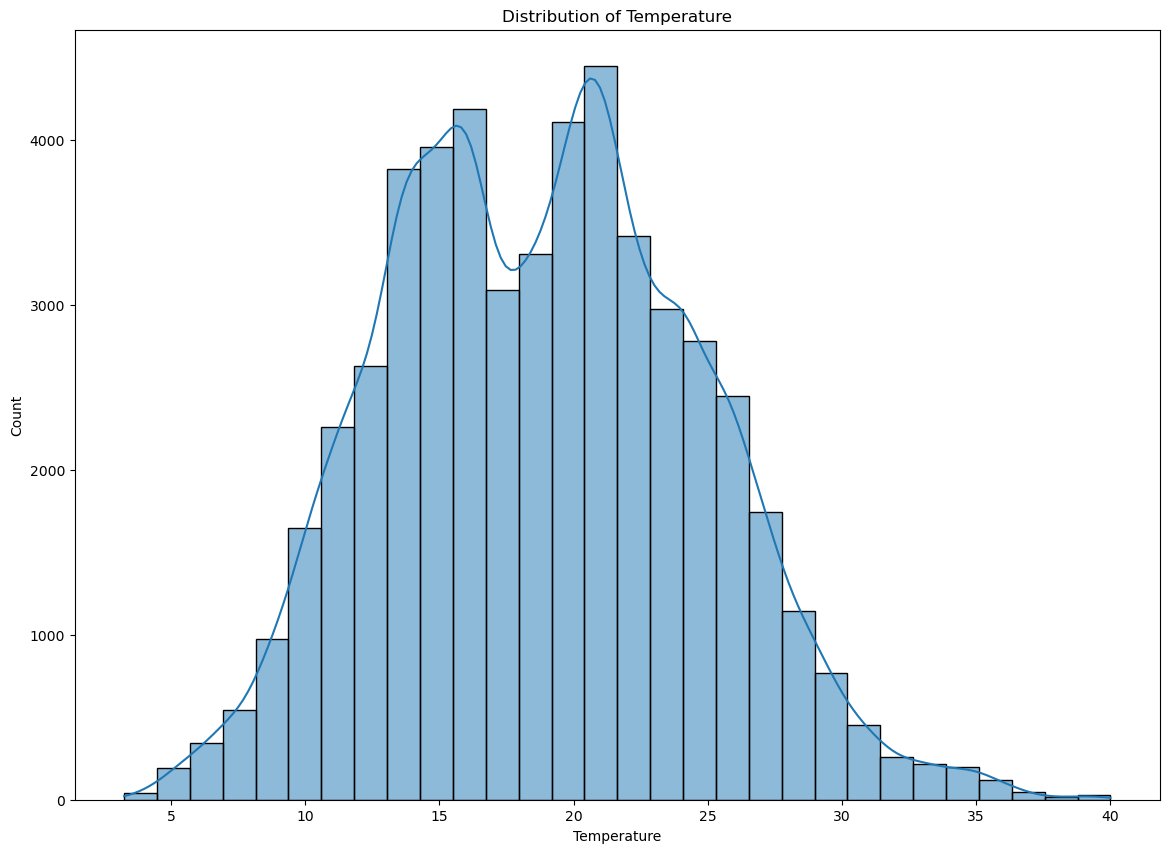

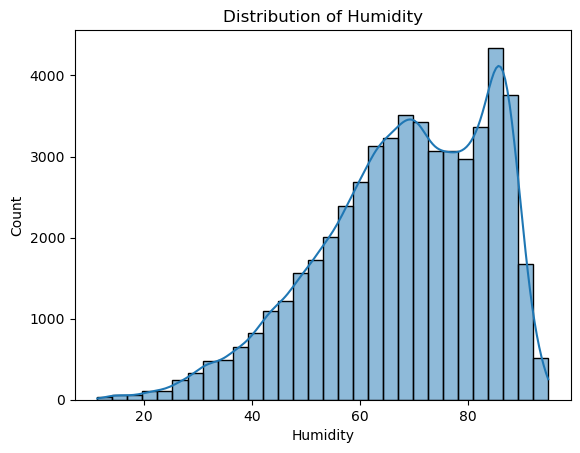

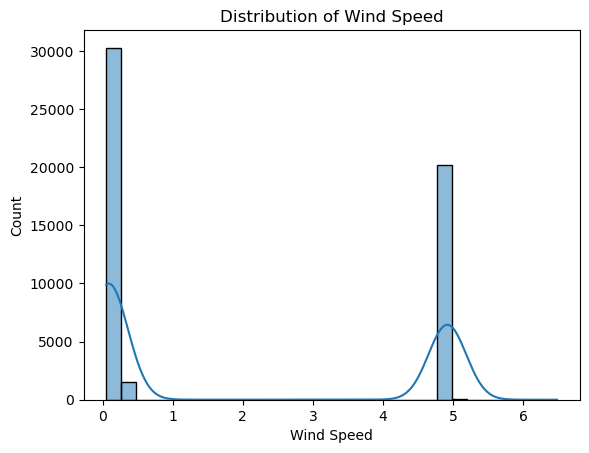

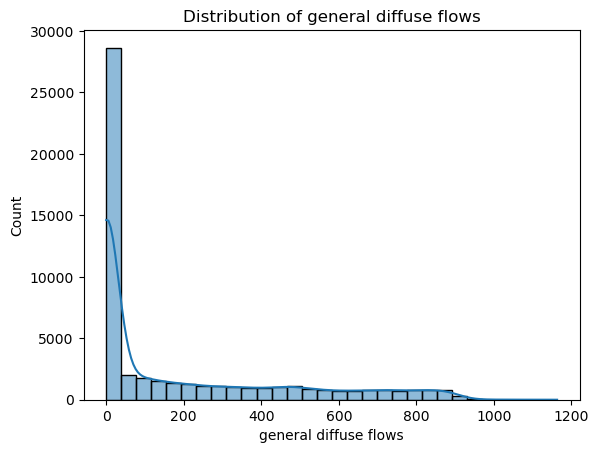

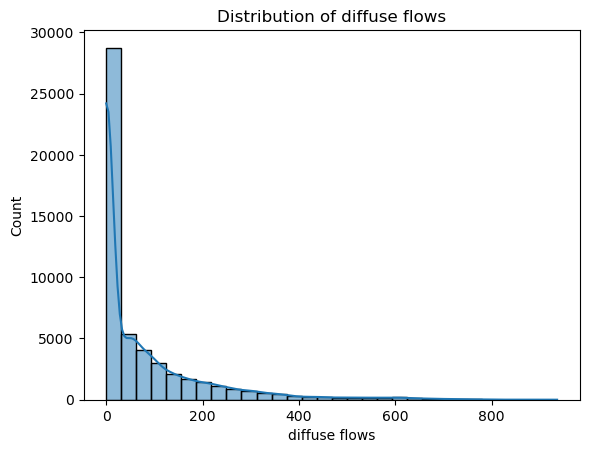

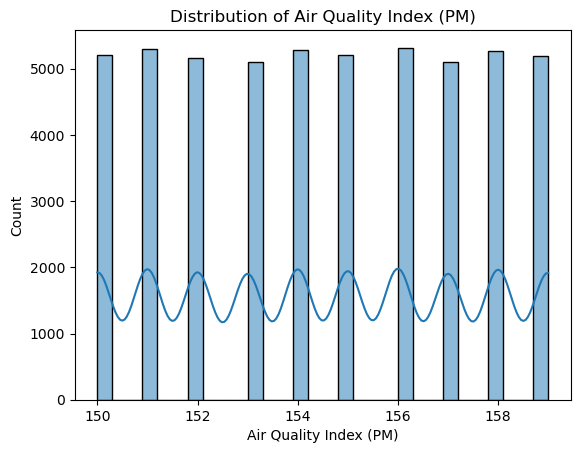

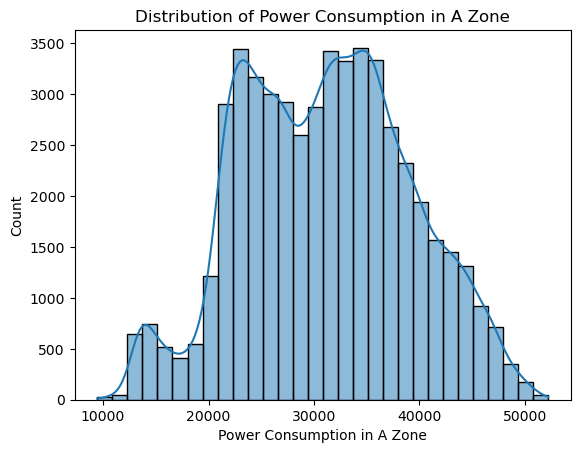

In [33]:
plt.figure(figsize=(14, 10))
for col in continous_cols:
    sns.histplot(df_new[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [34]:
# Temperature data is balanced
# Humidity is slightly imbalanced
# Wind Speed highly Imbalanced
# diffuse flows and general diffuse flows extremely imbalanced with right skewness
# air quality index balanced
# power consumption in A zone is balanced (Target)

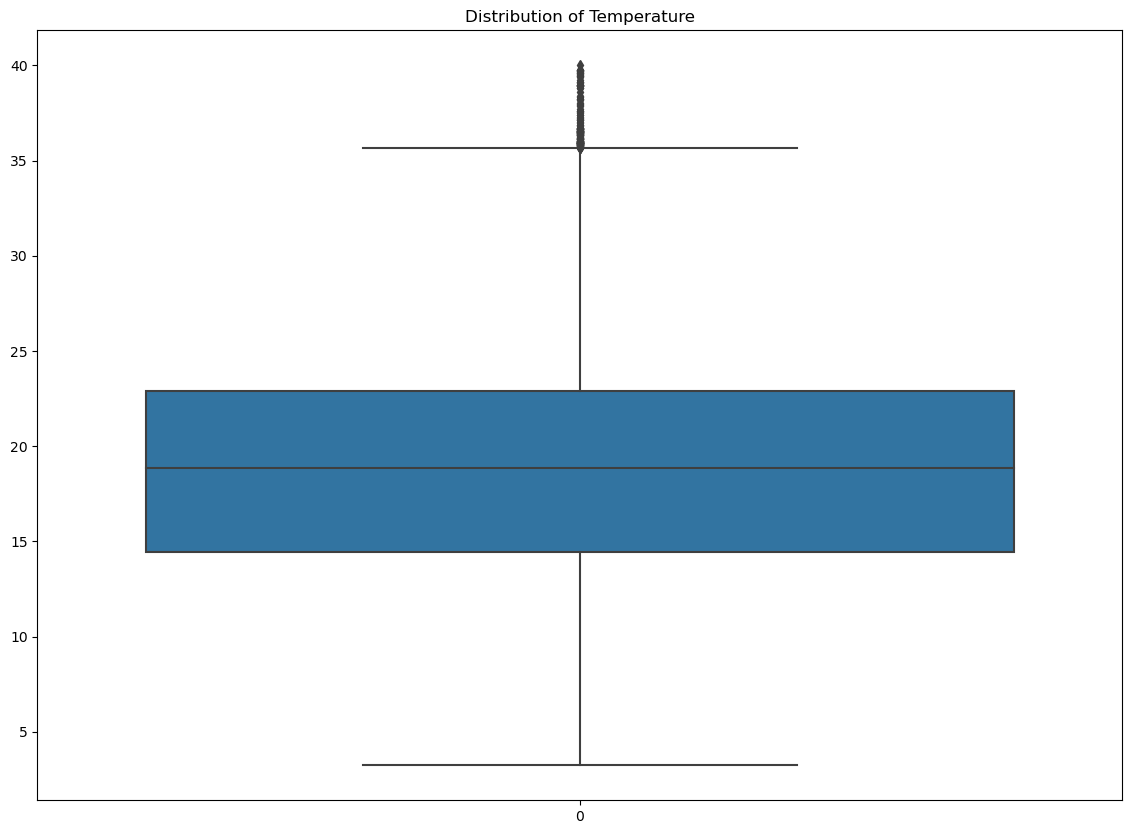

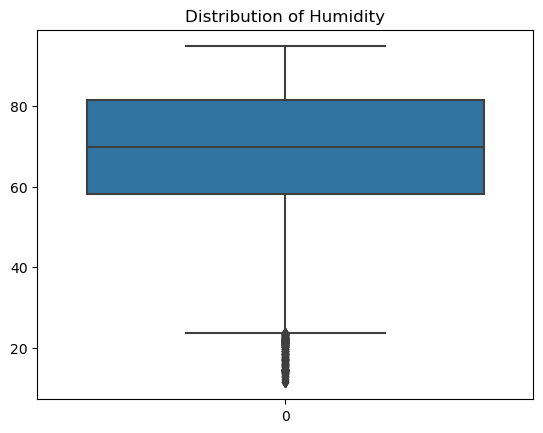

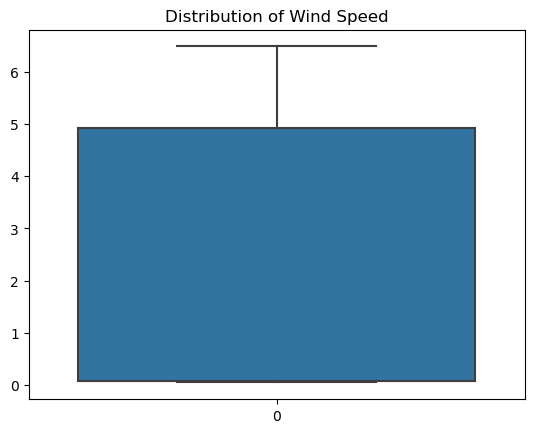

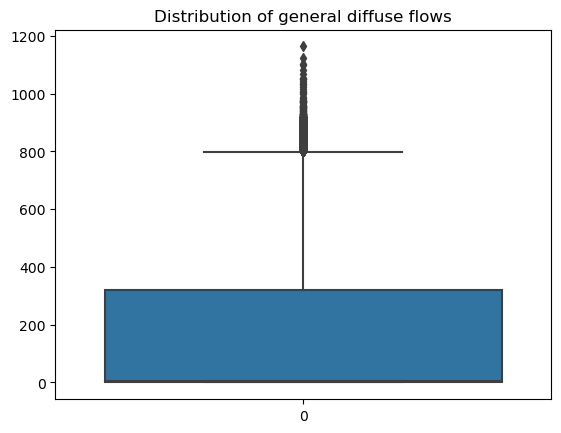

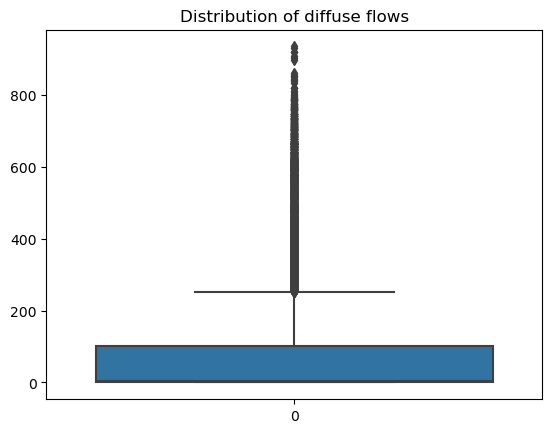

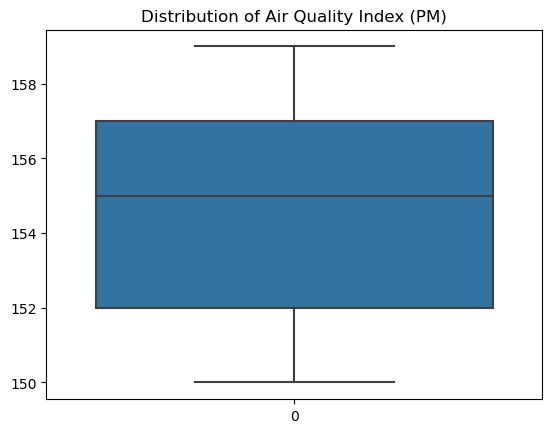

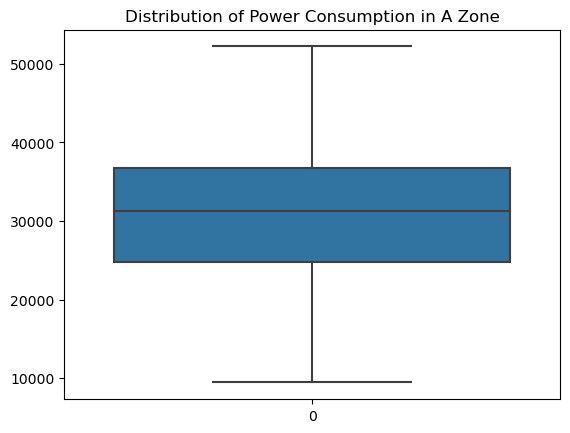

In [35]:
# handling the outliers
plt.figure(figsize=(14, 10))
for col in continous_cols:
    sns.boxplot(data = df_new[col])
    plt.title(f"Distribution of {col}")
    plt.show()

In [36]:
def outlier_percentage(df, columns):
    outlier_percentages = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        percentage = (len(outliers) / len(df)) * 100  
        
        outlier_percentages[col] = round(percentage, 2) 

    return outlier_percentages

# Calculate outlier percentages
outlier_percentages = outlier_percentage(df_new, continous_cols)
print(outlier_percentages)

{'Temperature': 0.27, 'Humidity': 0.55, 'Wind Speed': 0.0, 'general diffuse flows': 4.39, 'diffuse flows': 8.71, 'Air Quality Index (PM)': 0.0, 'Power Consumption in A Zone': 0.0}


In [37]:
# using capping method to handle outliers for temperature, humidity,  general diffuse flows and diffuse flows columns

In [38]:
outlier_cols = ['Temperature', 'Humidity', 'general diffuse flows', 'diffuse flows']

In [39]:
def replace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])

for col in outlier_cols:
    replace_outliers(df_new, col)

outlier_percentages = outlier_percentage(df_new, continous_cols)
print(outlier_percentages)

{'Temperature': 0.0, 'Humidity': 0.0, 'Wind Speed': 0.0, 'general diffuse flows': 0.0, 'diffuse flows': 0.0, 'Air Quality Index (PM)': 0.0, 'Power Consumption in A Zone': 0.0}


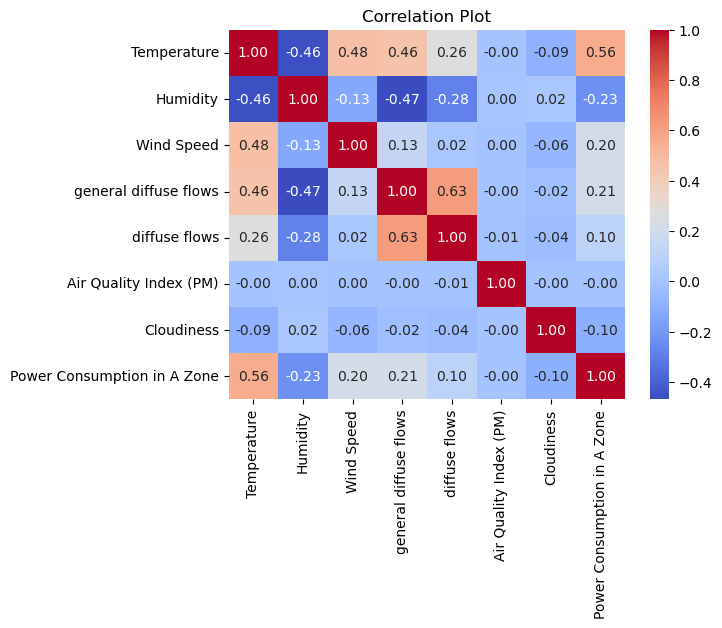

In [28]:
# Finding the correlation
sns.heatmap(df_new.corr(), annot = True, cmap= 'coolwarm', fmt = '.2f')
plt.title('Correlation Plot')
plt.show()

In [ ]:
# Power Consumption is most affected by Temperature (0.56).
# Humidity and Temperature have an inverse relationship (-0.46).
# Wind Speed and Temperature are moderately correlated (0.48).
# Diffuse flows and general diffuse flows are highly correlated (0.63).

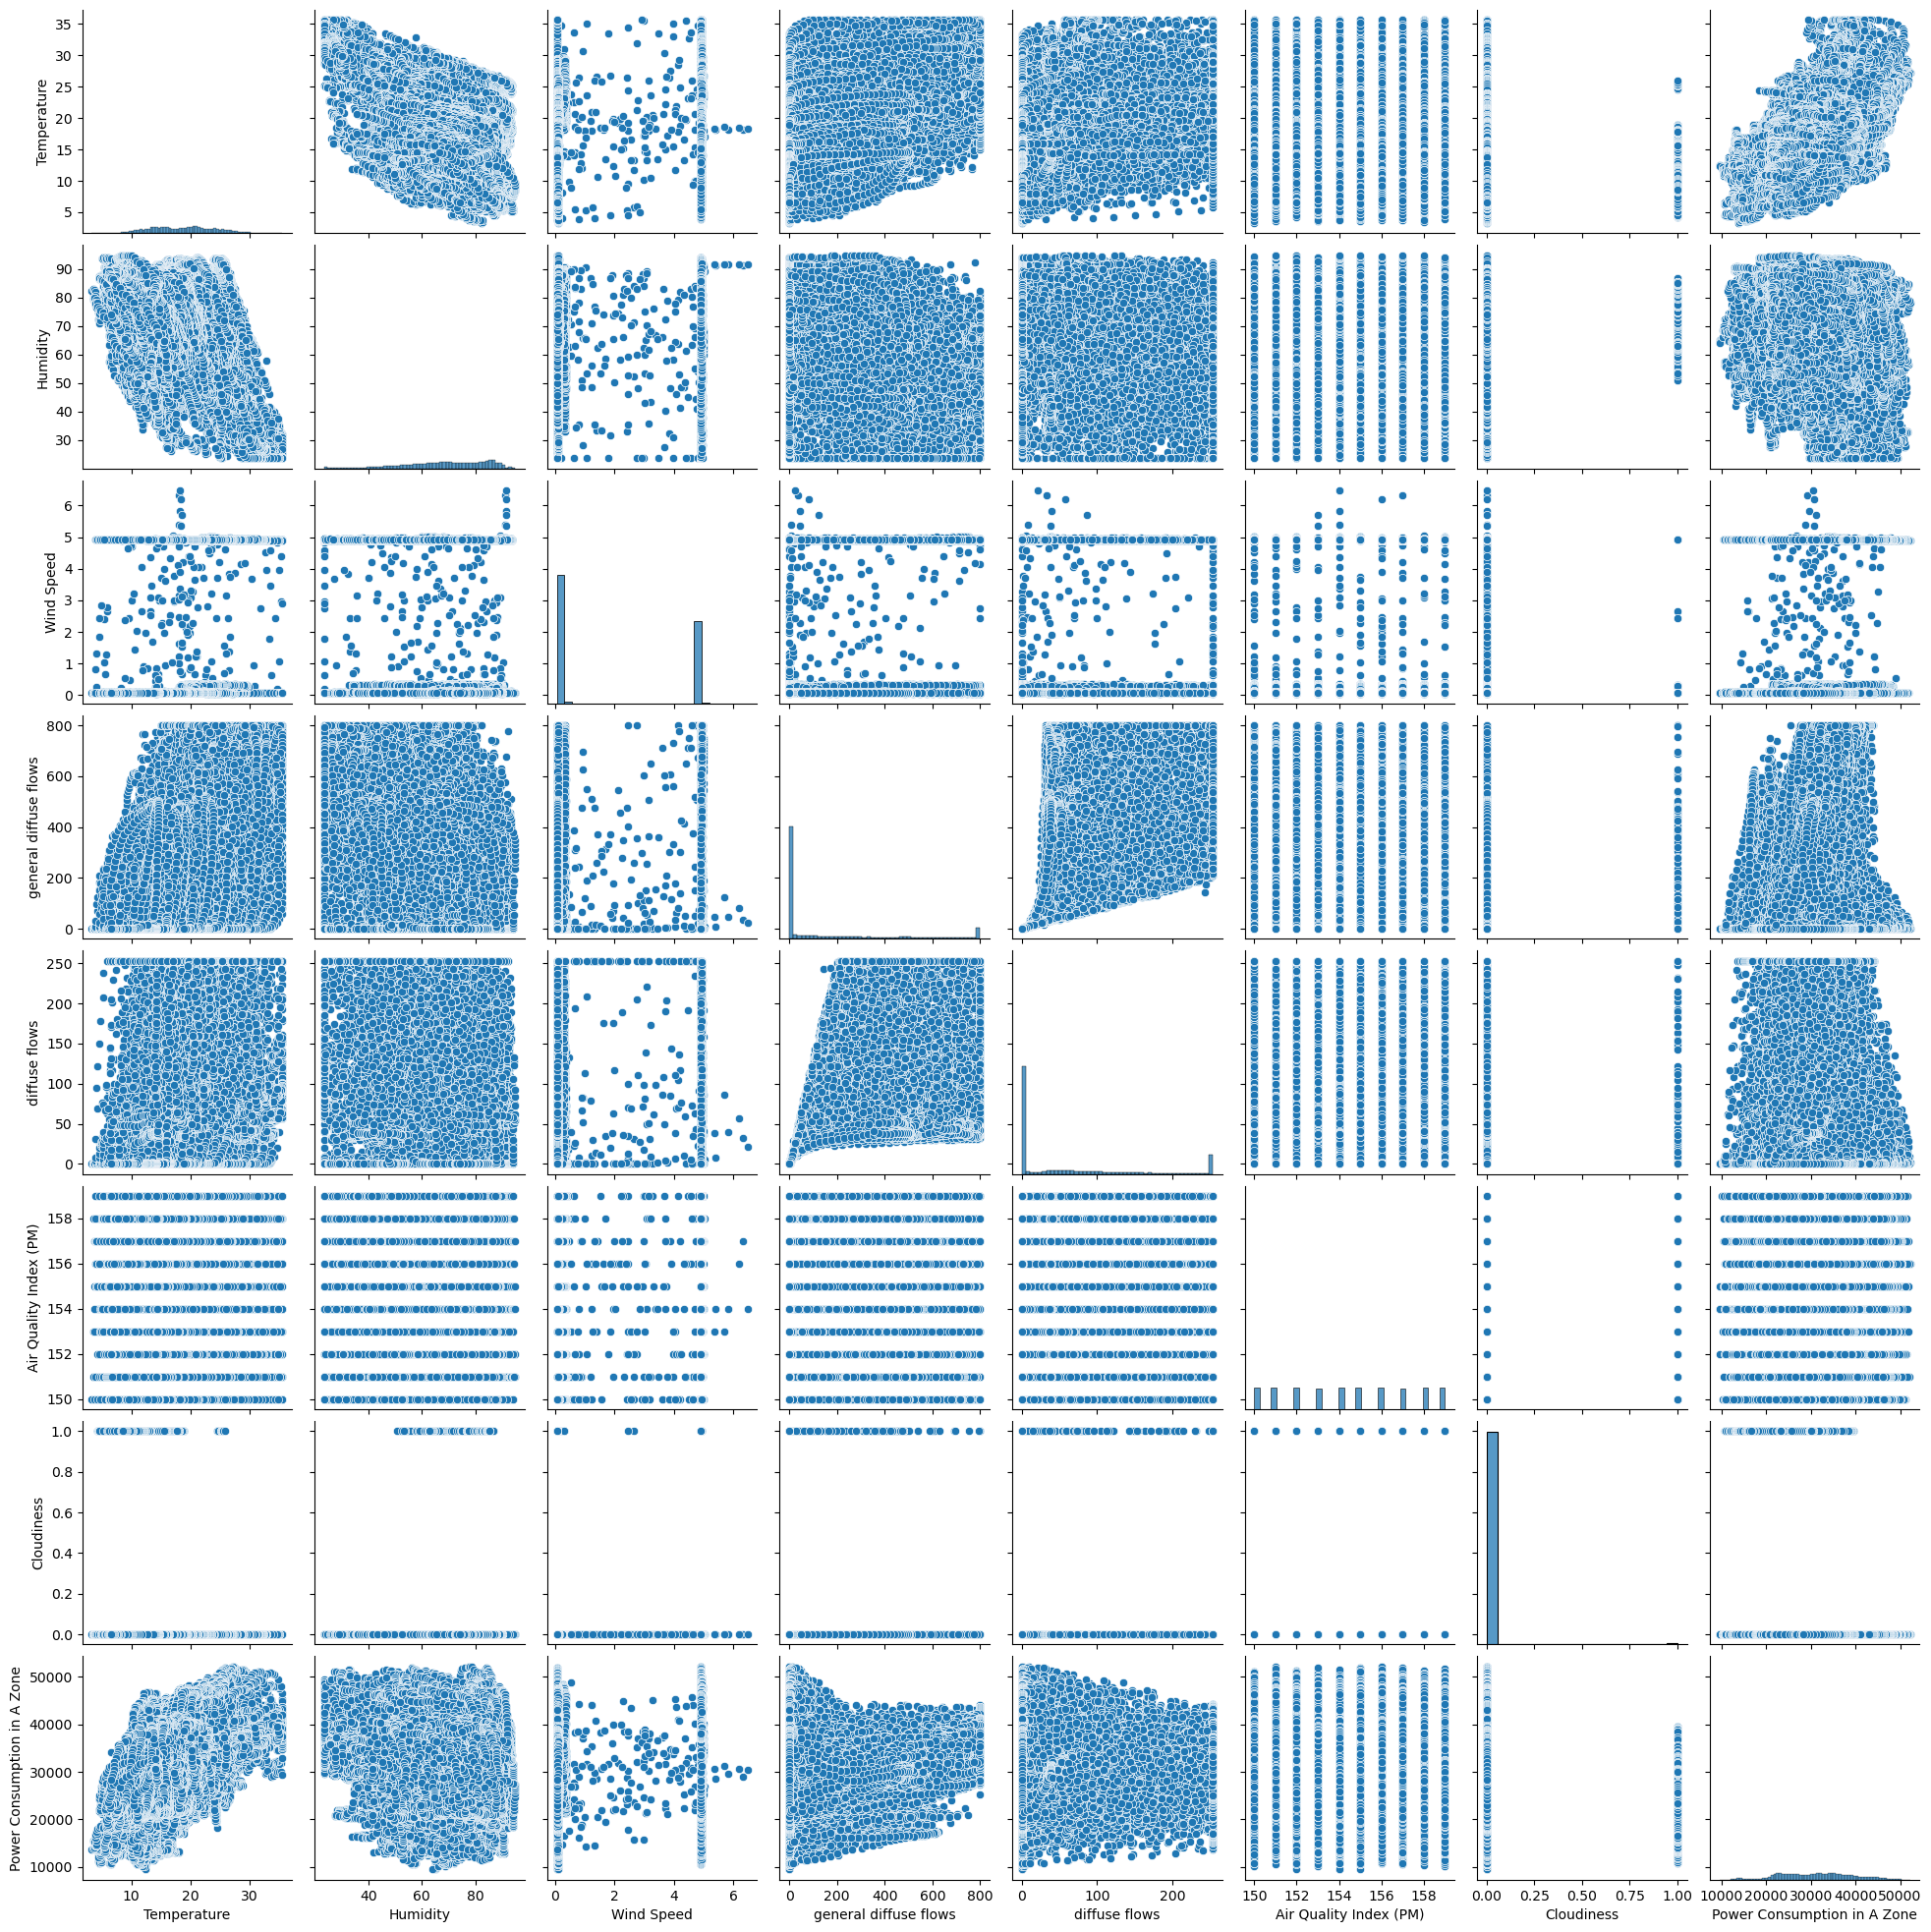

In [29]:
sns.pairplot(df_new)
plt.show()

In [30]:
# Splitting the data

In [40]:
x = df_new.drop('Power Consumption in A Zone', axis = 1)
y = df_new['Power Consumption in A Zone']

In [32]:
x.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness
0,6.559,73.8,0.083,0.051,0.119,158.0,1
1,6.414,74.5,0.083,0.070,0.085,159.0,1
2,6.313,74.5,0.080,0.062,0.100,151.0,1
3,6.121,75.0,0.083,0.091,0.096,151.0,1
4,5.921,75.7,0.081,0.048,0.085,154.0,1


In [33]:
y.head()

0    34055.69620
1    29814.68354
2    29128.10127
3    28228.86076
4    27335.69620
Name: Power Consumption in A Zone, dtype: float64

In [ ]:
# Data Modelling

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
# Splitting the Data

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 42)

In [ ]:
# Model1. Linear Regression

R-squared Score: 0.3253
Mean Absolute Error (MAE): 5322.6855


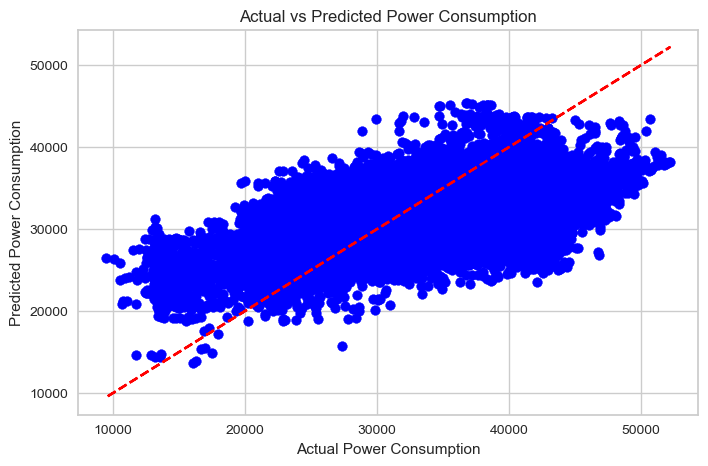

In [54]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Plot Actual vs Predicted Values
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='dashed')  # Ideal Prediction Line
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs Predicted Power Consumption')
plt.show()

In [ ]:
# Model2. Random Forest

R-squared Score: 0.6323
Mean Absolute Error (MAE): 3374.6790


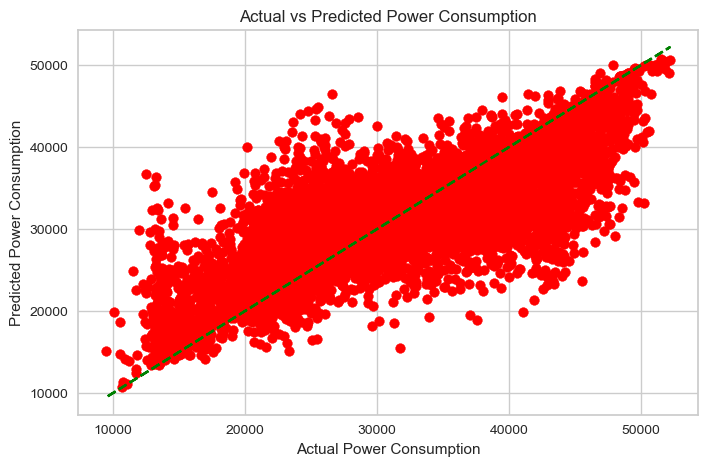

In [55]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
r2_rf = r2_score(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f'R-squared Score: {r2_rf:.4f}')
print(f'Mean Absolute Error (MAE): {mae_rf:.4f}')

# Plot Actual vs Predicted Values
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='red')
plt.plot(y_test, y_test, color='green', linestyle='dashed')  # Ideal Prediction Line
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs Predicted Power Consumption')
plt.show()

In [ ]:
# Using Hyperparameter Tuning

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf = RandomForestRegressor(random_state=42)
# rf_cv = RandomizedSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
# rf_cv.fit(x_train, y_train)

# print(f'Best Params: {rf_cv.best_params_}')
# best_rf = rf_cv.best_estimator_

# # Evaluate again with best parameters
# y_pred = best_rf.predict(x_test)
# r2_rf = r2_score(y_test, y_pred)
# mae_rf = mean_absolute_error(y_test, y_pred)

# print(f'Optimized R-squared Score: {r2_rf:.4f}')
# print(f'Optimized Mean Absolute Error (MAE): {mae_rf:.4f}')

In [ ]:
# Model3. Decision Tree

R-squared Score: 0.2919
Mean Absolute Error (MAE): 4086.1489


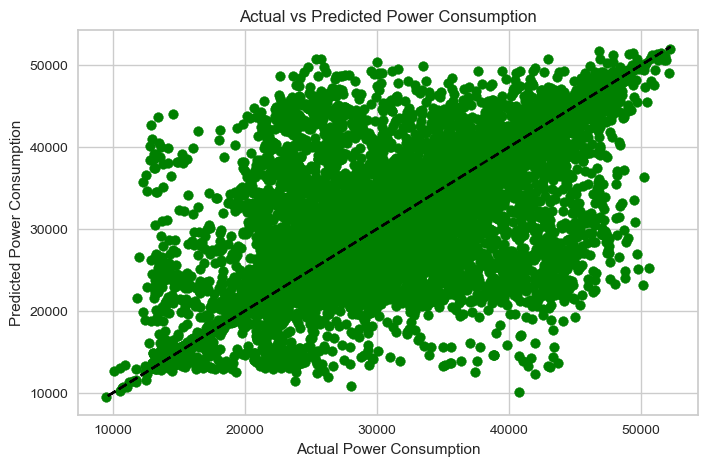

In [57]:
dt = DecisionTreeRegressor(random_state = 42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
r2_dt = r2_score(y_test, y_pred)
mae_dt = mean_absolute_error(y_test, y_pred)

print(f'R-squared Score: {r2_dt:.4f}')
print(f'Mean Absolute Error (MAE): {mae_dt:.4f}')

# Plot Actual vs Predicted Values
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='green')
plt.plot(y_test, y_test, color='black', linestyle='dashed')  # Ideal Prediction Line
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs Predicted Power Consumption')
plt.show()

In [ ]:
# using automation to find the best model

In [45]:
from pycaret.regression import *

In [46]:
regression_model= setup(data=df_new, target= 'Power Consumption in A Zone', session_id=123)

,Description,Value
0,Session id,123
1,Target,Power Consumption in A Zone
2,Target type,Regression
3,Original data shape,"(52139, 8)"
4,Transformed data shape,"(52139, 8)"
5,Transformed train set shape,"(36497, 8)"
6,Transformed test set shape,"(15642, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [39]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3443.3931,24205804.2500,4919.2489,0.6229,0.1701,0.1222,12.7390
rf,Random Forest Regressor,3524.3314,25029026.7864,5002.5738,0.6100,0.1728,0.1252,20.1580
xgboost,Extreme Gradient Boosting,4021.7322,29443017.0000,5425.9454,0.5412,0.1875,0.1429,0.3240
lightgbm,Light Gradient Boosting Machine,4275.5040,31374750.0655,5601.0616,0.5111,0.1946,0.1526,0.2060
gbr,Gradient Boosting Regressor,4761.6063,36580484.5590,6047.9194,0.4300,0.2092,0.1695,1.4350
ada,AdaBoost Regressor,5344.1719,42573699.4360,6524.5284,0.3366,0.2274,0.1937,0.5860
knn,K Neighbors Regressor,4976.8888,43041814.8000,6559.9975,0.3294,0.2257,0.1773,0.6440
llar,Lasso Least Angle Regression,5337.9305,43476741.2000,6593.4161,0.3226,0.2264,0.1887,0.2870
ridge,Ridge Regression,5337.9436,43476562.0000,6593.4028,0.3226,0.2264,0.1887,0.2730
lasso,Lasso Regression,5337.9305,43476742.0000,6593.4161,0.3226,0.2264,0.1887,0.3140


ExtraTreesRegressor(n_jobs=-1, random_state=123)

In [47]:
rf= create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3555.7592,25634901.4507,5063.0921,0.6039,0.1735,0.1253
1,3473.8652,24217620.1879,4921.1401,0.6167,0.1682,0.1225
2,3525.1820,25207766.4884,5020.7337,0.6107,0.1751,0.1263
3,3493.8573,24636670.1144,4963.5340,0.6122,0.1743,0.1261
4,3518.0495,25139590.9977,5013.9397,0.6141,0.1731,0.1255
5,3584.5224,26303806.9942,5128.7237,0.6010,0.1791,0.1288
6,3549.7887,25005337.2596,5000.5337,0.6080,0.1720,0.1260
7,3483.7311,24399011.0484,4939.5355,0.6095,0.1674,0.1206
8,3543.0185,24967838.1976,4996.7828,0.6062,0.1733,0.1268


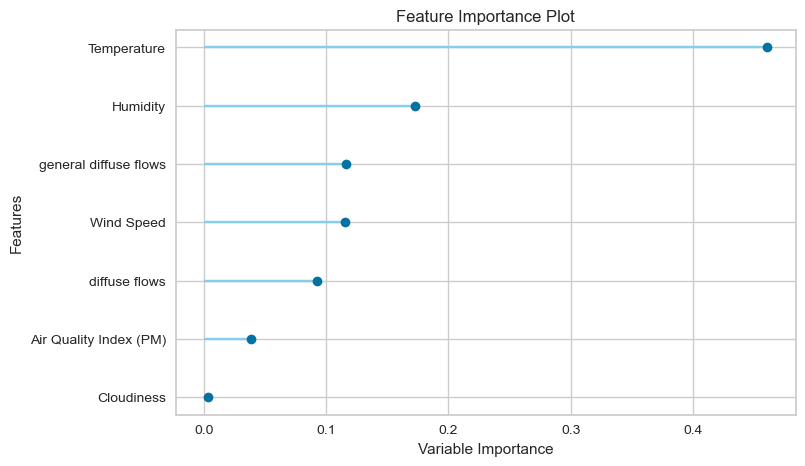

In [48]:
plot_model(rf, plot = 'feature') # Feature Importance

In [ ]:
# Selecting the top 5 features and evaluating Model Random Forest again

In [51]:
x_new = df_new.drop(['Power Consumption in A Zone', 'Air Quality Index (PM)' ,'Cloudiness'], axis = 1)
x_train_new, x_test_new, y_train, y_test = train_test_split(x_new, y , test_size = 0.2, random_state = 42)

R-squared Score: 0.6373
Mean Absolute Error (MAE): 3317.6196


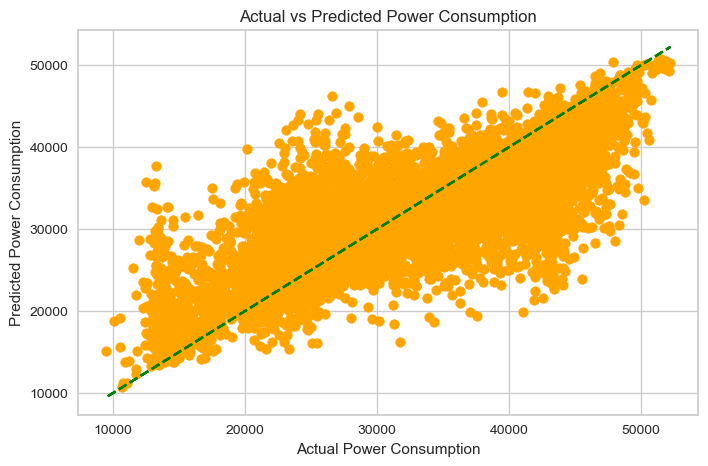

In [58]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(x_train_new, y_train)
y_pred = rf.predict(x_test_new)
r2_rf = r2_score(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f'R-squared Score: {r2_rf:.4f}')
print(f'Mean Absolute Error (MAE): {mae_rf:.4f}')

# Plot Actual vs Predicted Values
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='orange')
plt.plot(y_test, y_test, color='green', linestyle='dashed')  # Ideal Prediction Line
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs Predicted Power Consumption')
plt.show()

In [ ]:
# using Lasso and Ridge for Feature selection and Regularization

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

In [47]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)

ridge.fit(x_train_scaled, y_train)
lasso.fit(x_train_scaled, y_train)


y_pred_ridge = ridge.predict(x_test_scaled)
y_pred_lasso = lasso.predict(x_test_scaled)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print('----------------------------------------')

In [48]:
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Ridge Regression Performance:
R² Score: 0.3253
Mean Absolute Error (MAE): 5322.6843
----------------------------------------
Lasso Regression Performance:
R² Score: 0.3253
Mean Absolute Error (MAE): 5322.6848
----------------------------------------


In [ ]:
# Key Takeaways
# 1. Feature selection improved the model by reducing complexity.
# 2. Random Forest performed well with selected features.
# 3. Since we considered Random Forest , we ignored skewness here.
# 4. Regularization did not significantly impact feature selection.
# 5. Potential improvements → Hyperparameter tuning, adding more data, or trying boosting models like XGBoost.